<a href="https://colab.research.google.com/github/joshualewin6/Colab-Notebook/blob/main/Copy_of_Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

It allows a model to better fit the data and catch trends you might have missed. Plus, some trends are straight up polynomials, for instance, weight with respect to height is usually cubic.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

It can really be skecthy around the edges if your model is supposed to be peiodic or exponential and you instead put a polynomial. Additionally, if you mess up the degree, a model will grossly overfit the data.

**Task3**:

What's the point of using b splines?

Different polynomials can be used between nodes. It's a great way to create a trend foor different clumps in the data and then link them together.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

It uses kernels as a way to determine how data points are related to each other, creating uncertainty matrices of where the points could be based on priors, and then creating relations through data points to zero out rows and columns of the uncertainty matrix. Doing this repeatedly with different data points each time allows it to build a model.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [6]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-usev37ts
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-usev37ts
  Resolved https://github.com/pydata/xarray.git to commit 4bbab48cacf94ff285475bd7b7abeea3b2ea888f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev16+g4bbab48c-py3-none-any.whl size=1255523 sha256=9154bcd0010d79a8ff467b04f273efd4c5fd84386a19896011e75840fc94d434
  Stored in directory: /tmp/pip-ephem-wheel-cache-yk4axaan/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.0 MB/s eta 0:00:00


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import xarray as xr
import pymc as pm
from scipy.interpolate import PchipInterpolator
import bambi as bmb

In [2]:
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/howell.csv')
howell

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0
...,...,...,...,...
539,145.415,31.127751,17.0,1
540,162.560,52.163080,31.0,1
541,156.210,54.062497,21.0,0
542,71.120,8.051258,0.0,1


In [4]:
model_howell_poly_3 = bmb.Model("weight ~ poly(height, degree=3)", howell)
idata_howell_poly_3 = model_howell_poly_3.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


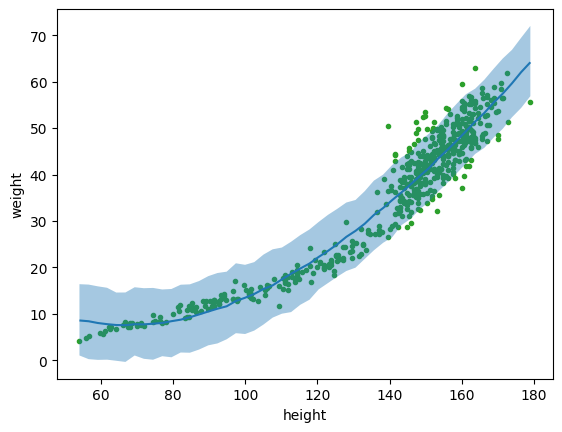

In [6]:
bmb.interpret.plot_predictions(model_howell_poly_3, idata_howell_poly_3, "height", pps=True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

I didn't previously internalize that there was assumed error in the x values, but it makes sense considering the GP is modeling the whole dataset and not just the predicted variables, and is able to take into account priors for every data point.

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

My favorite graph is the first attempt at plotting predicted CO2 levels without a specified mean function, since the graph is so obviously wrong. It just goes to show how with more difficult problems, GPs can give really bad predictions if you don't know how to use them.